# Actividad 5.2 Componentes Principales

**Realizar una regresión lineal múltiple utilizando todas las variables (sin interacciones ni términos de orden superior). Utilizar gdpp como la variable de respuesta.**

**Incluir la interpretacón de los p-value, VIF, supuestos, residuales, etc...**

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Data/Country-data.csv')

Coefficients and Statistical Significance:
      Feature  Coefficient  Standard Error    t-value       p-value
0  child_mort    66.566748       35.522440   1.873935  6.278581e-02
1     exports    28.486421       43.210632   0.659246  5.106977e-01
2      health  1548.788896      227.184454   6.817319  1.853684e-10
3     imports   -28.119038       42.516275  -0.661371  5.093376e-01
4      income     0.785572        0.043666  17.990300  0.000000e+00
5   inflation  -100.497786       56.673052  -1.773291  7.810715e-02
6  life_expec   388.947971      142.967462   2.720535  7.248146e-03
7   total_fer   615.090251      679.917393   0.904654  3.670259e-01

Variance Inflation Factors:
      Feature        VIF
0  child_mort   8.060881
1     exports  16.008933
2      health   9.832297
3     imports  17.078102
4      income   4.282023
5   inflation   1.942327
6  life_expec  20.033757
7   total_fer  17.652689


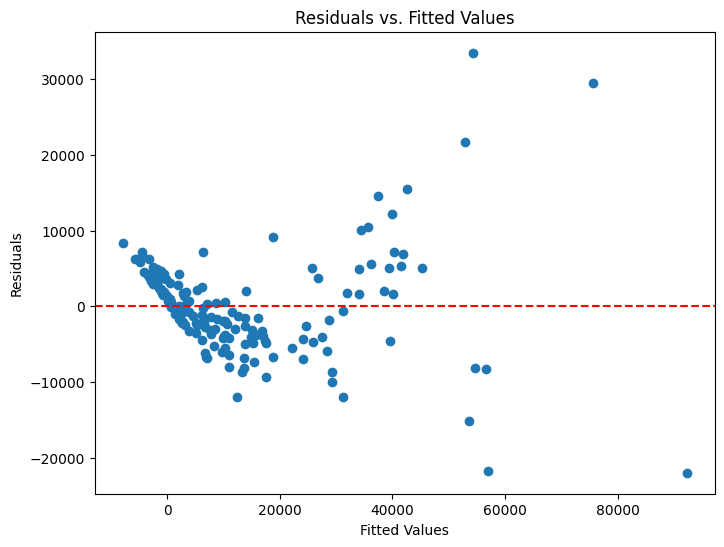

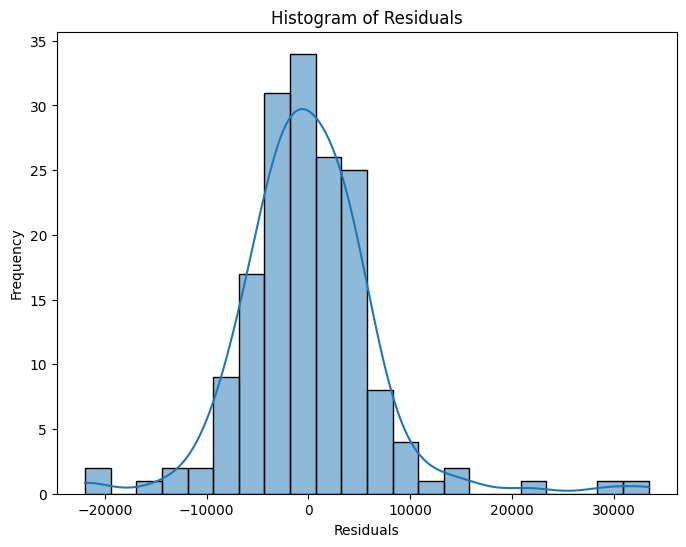

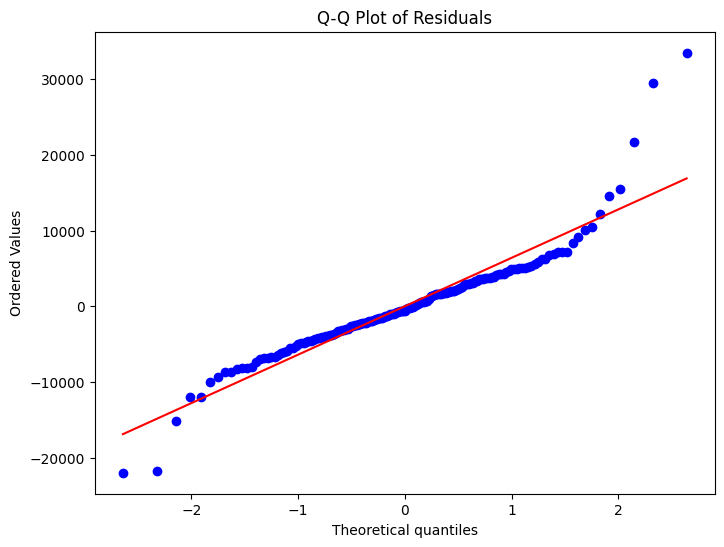

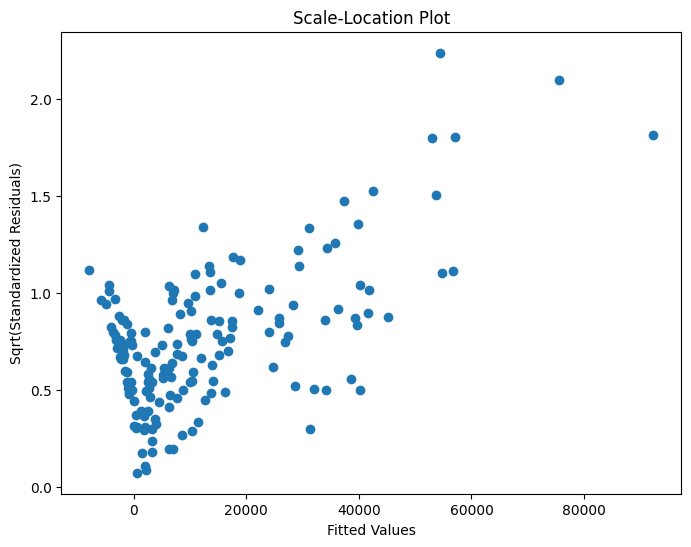


Durbin-Watson statistic: 1.913666473365016

Shapiro-Wilk Test:
Statistic: 0.8996724930901254
p-value: 3.077452228706713e-09

Breusch-Pagan Test:
Statistic: 73.59365725098027
p-value: 9.429361944231251e-13

Descriptive Statistics of Residuals:
count    1.670000e+02
mean     1.786313e-12
std      6.707845e+03
min     -2.196343e+04
25%     -3.685953e+03
50%     -5.750353e+02
75%      3.348766e+03
max      3.346162e+04
Name: gdpp, dtype: float64

Correlation Matrix of Predictors:
            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.

In [13]:
df = df.dropna()

X = df.drop(['country', 'gdpp'], axis=1)
y = df['gdpp']

#Regresión
model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

y_pred = model.predict(X)
residuals = y - y_pred

n = X.shape[0]
p = X.shape[1]
df_residuals = n - p - 1

MSE = np.sum(residuals**2) / df_residuals

X_with_intercept = np.column_stack((np.ones(n), X))
var_beta = MSE * np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept))
standard_errors = np.sqrt(np.diagonal(var_beta))

t_stats = coefficients / standard_errors[1:]
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df_residuals)) for t in t_stats]

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Standard Error': standard_errors[1:],
    't-value': t_stats,
    'p-value': p_values
})

print("Coefficients and Statistical Significance:")
print(coef_df)

#VIFs
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)

#Residuals vs. Fitted Values
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Normality of Residuals
# Histogram
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Scale-Location Plot
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(8,6))
plt.scatter(y_pred, np.sqrt(np.abs(standardized_residuals)))
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.title('Scale-Location Plot')
plt.show()

# Independence of Errors - Durbin-Watson Test
dw_stat = durbin_watson(residuals)
print('\nDurbin-Watson statistic:', dw_stat)

# Shapiro-Wilk Test for Normality
shapiro_stat, shapiro_p = shapiro(residuals)
print('\nShapiro-Wilk Test:')
print('Statistic:', shapiro_stat)
print('p-value:', shapiro_p)

# Breusch-Pagan Test for Homoscedasticity
X_const = sm.add_constant(X)
bp_test = sms.het_breuschpagan(residuals, X_const)
bp_stat = bp_test[0]
bp_pvalue = bp_test[1]
print('\nBreusch-Pagan Test:')
print('Statistic:', bp_stat)
print('p-value:', bp_pvalue)

# Descriptive Statistics of Residuals
print('\nDescriptive Statistics of Residuals:')
print(residuals.describe())

# Correlation Matrix of Predictors
print('\nCorrelation Matrix of Predictors:')
corr_matrix = X.corr()
print(corr_matrix)

En conclusión, el análisis de regresión lineal múltiple identificó que las variables gasto en salud, ingreso per cápita y esperanza de vida son predictores significativos del PIB per cápita (gdpp). Estas variables muestran una relación estadísticamente significativa con el gdpp, lo que indica que mayores inversiones en salud, ingresos más altos y una mayor esperanza de vida están asociados con un aumento en el PIB per cápita de los países analizados.

No obstante, el modelo presenta violaciones en los supuestos fundamentales de la regresión lineal. Las pruebas estadísticas revelaron que los residuos no siguen una distribución normal (prueba de Shapiro-Wilk) y existe heterocedasticidad (prueba de Breusch-Pagan), lo que implica que la varianza de los errores no es constante y puede afectar la confiabilidad de las inferencias. Además, se detectó multicolinealidad significativa entre las variables independientes, especialmente entre tasa de mortalidad infantil, esperanza de vida y tasa de fertilidad total, así como entre exportaciones e importaciones, evidenciado por altos valores en los Factores de Inflación de la Varianza (VIF) y fuertes correlaciones.

**Aplicar la técnica de componentes principales a los datos para reducir la dimensionalidad de las variables predictoras.**

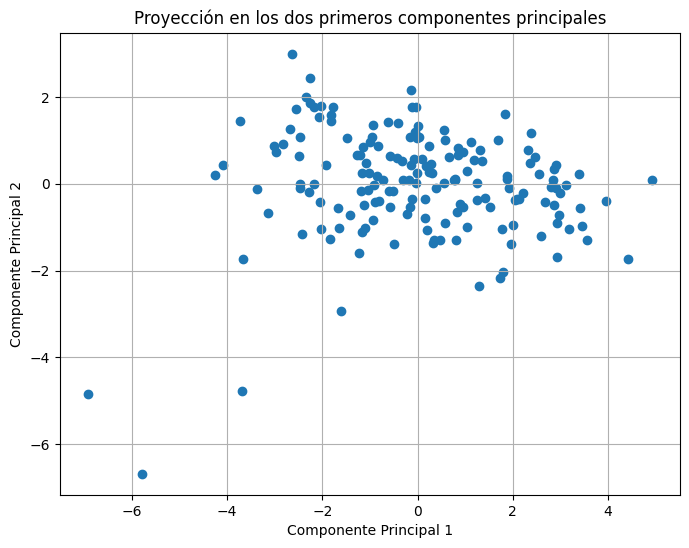

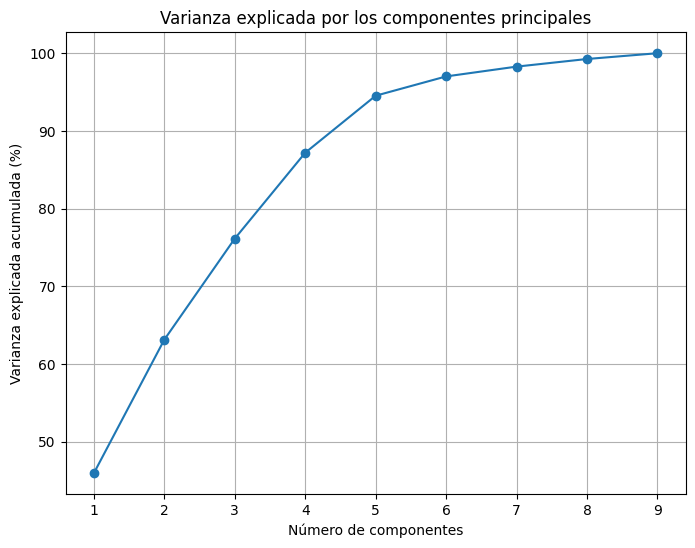

Valores propios y varianza explicada por cada componente principal:
Componente Principal 1: Valor propio = 4.1606, Varianza explicada = 45.95%
Componente Principal 2: Valor propio = 1.5557, Varianza explicada = 17.18%
Componente Principal 3: Valor propio = 1.1774, Varianza explicada = 13.00%
Componente Principal 4: Valor propio = 1.0008, Varianza explicada = 11.05%
Componente Principal 5: Valor propio = 0.6646, Varianza explicada = 7.34%
Componente Principal 6: Valor propio = 0.2249, Varianza explicada = 2.48%
Componente Principal 7: Valor propio = 0.1141, Varianza explicada = 1.26%
Componente Principal 8: Valor propio = 0.0888, Varianza explicada = 0.98%
Componente Principal 9: Valor propio = 0.0673, Varianza explicada = 0.74%

Vectores propios (componentes principales):
                 PC1       PC2       PC3       PC4       PC5       PC6  \
child_mort  0.419519 -0.192884  0.029544 -0.370653 -0.168970 -0.200628   
exports    -0.283897 -0.613163 -0.144761 -0.003091  0.057616  0.05933

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('/content/Data/Country-data.csv')

# Preprocesamiento de datos
# 2.1. Eliminar la columna 'country'
data_numeric = data.drop('country', axis=1)

# Manejar valores faltantes (si existen)
data_numeric = data_numeric.dropna()

# Estandarizar las variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Calcular la matriz de covarianza
cov_matrix = np.cov(data_scaled.T)

# Calcular los valores y vectores propios de la matriz de covarianza
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Ordenar los valores y vectores propios de mayor a menor
# Obtener los índices que ordenarían los valores propios de mayor a menor
sorted_index = np.argsort(eigen_values)[::-1]
# Ordenar los valores propios
eigen_values_sorted = eigen_values[sorted_index]
# Ordenar los vectores propios
eigen_vectors_sorted = eigen_vectors[:, sorted_index]

# Calcular la varianza explicada por cada componente principal
explained_variance = eigen_values_sorted / np.sum(eigen_values_sorted)

# Proyectar los datos en el nuevo espacio de componentes principales
data_projected = np.dot(data_scaled, eigen_vectors_sorted)

# Crear un DataFrame con los componentes principales
pc_columns = [f'PC{i+1}' for i in range(len(eigen_values_sorted))]
pc_df = pd.DataFrame(data=data_projected, columns=pc_columns)
# Agregar la columna 'country' para identificación
pc_df = pd.concat([pc_df, data['country'].reset_index(drop=True)], axis=1)

# Visualización de los datos proyectados en los dos primeros componentes principales
plt.figure(figsize=(8,6))
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección en los dos primeros componentes principales')
plt.grid(True)
plt.show()

# Gráfica de varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance*100, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada (%)')
plt.title('Varianza explicada por los componentes principales')
plt.grid(True)
plt.show()

# Mostrar los valores propios y la varianza explicada
print("Valores propios y varianza explicada por cada componente principal:")
for i, (eigen_value, variance_ratio) in enumerate(zip(eigen_values_sorted, explained_variance)):
    print(f"Componente Principal {i+1}: Valor propio = {eigen_value:.4f}, Varianza explicada = {variance_ratio*100:.2f}%")

# Mostrar los vectores propios (componentes principales)
loadings = pd.DataFrame(eigen_vectors_sorted, columns=pc_columns, index=data_numeric.columns)
print("\nVectores propios (componentes principales):")
print(loadings)


**Elegir los componentes principales que expliquen al menos el 80% de la varianza total.**

**Obtener las ecuaciones de Transformación Lineal de cada componente en función de las variables más importantes.**

**Dar un nombre a cada componente principal con base en las variables que lo conforman.**

In [22]:
# Calcular la varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance)

# Determinar el número de componentes que explican al menos el 80% de la varianza
num_components = np.argmax(cumulative_explained_variance >= 0.80) + 1
print(f"\nNúmero de componentes que explican al menos el 80% de la varianza: {num_components}")

# Mostrar la varianza explicada por cada componente principal
print("\nVarianza explicada por cada componente principal:")
for i, (eigen_value, variance_ratio, cumulative) in enumerate(zip(eigen_values_sorted, explained_variance, cumulative_explained_variance)):
    print(f"Componente Principal {i+1}: Valor propio = {eigen_value:.4f}, Varianza explicada = {variance_ratio*100:.2f}%, Varianza acumulada = {cumulative*100:.2f}%")

# Obtener las cargas (loadings) de los componentes principales seleccionados
# Seleccionamos los vectores propios correspondientes a los componentes principales que explican al menos el 80% de la varianza
components_selected = eigen_vectors_sorted[:, :num_components]
component_names = [f'PC{i+1}' for i in range(num_components)]

# Creamos un DataFrame de las cargas (loadings)
loadings = pd.DataFrame(components_selected, columns=component_names, index=data_numeric.columns)

# Obtener las ecuaciones de Transformación Lineal y asignar nombres a los componentes
print("\nEcuaciones de Transformación Lineal y asignación de nombres a los componentes principales:")
for i in range(num_components):
    print(f"\nComponente Principal {i+1} (PC{i+1}):")
    loadings_pc = loadings.iloc[:, i]
    sorted_loadings = loadings_pc.reindex(loadings_pc.abs().sort_values(ascending=False).index)
    threshold = 0.3
    significant_loadings = sorted_loadings[sorted_loadings.abs() > threshold]
    print("Variables más importantes y sus coeficientes:")
    for variable, coefficient in significant_loadings.items():
        print(f"{variable}: {coefficient:.4f}")
    equation_terms = [f"({coefficient:.4f}) * {variable}" for variable, coefficient in significant_loadings.items()]
    equation = " + ".join(equation_terms)
    print(f"\nEcuación de PC{i+1}:")
    print(f"PC{i+1} = {equation}")
    variables_positive = significant_loadings[significant_loadings > 0].index.tolist()
    variables_negative = significant_loadings[significant_loadings < 0].index.tolist()
    print(f"\nVariables con cargas positivas: {variables_positive}")
    print(f"Variables con cargas negativas: {variables_negative}")
    if i == 0:
        component_name = "Indicador de Desarrollo Socioeconómico"
    elif i == 1:
        component_name = "Apertura Comercial"
    elif i == 2:
        component_name = "Gasto en Salud vs Inflación"
    elif i == 3:
        component_name = "Bienestar Económico y Social"
    else:
        component_name = f"Componente Principal {i+1}"
    print(f"Nombre asignado: {component_name}")

data_projected_selected = data_projected[:, :num_components]
pc_columns_selected = [f'PC{i+1}' for i in range(num_components)]
pc_df_selected = pd.DataFrame(data=data_projected_selected, columns=pc_columns_selected)
pc_df_selected = pd.concat([pc_df_selected, data['country'].reset_index(drop=True)], axis=1)


Número de componentes que explican al menos el 80% de la varianza: 4

Varianza explicada por cada componente principal:
Componente Principal 1: Valor propio = 4.1606, Varianza explicada = 45.95%, Varianza acumulada = 45.95%
Componente Principal 2: Valor propio = 1.5557, Varianza explicada = 17.18%, Varianza acumulada = 63.13%
Componente Principal 3: Valor propio = 1.1774, Varianza explicada = 13.00%, Varianza acumulada = 76.14%
Componente Principal 4: Valor propio = 1.0008, Varianza explicada = 11.05%, Varianza acumulada = 87.19%
Componente Principal 5: Valor propio = 0.6646, Varianza explicada = 7.34%, Varianza acumulada = 94.53%
Componente Principal 6: Valor propio = 0.2249, Varianza explicada = 2.48%, Varianza acumulada = 97.02%
Componente Principal 7: Valor propio = 0.1141, Varianza explicada = 1.26%, Varianza acumulada = 98.28%
Componente Principal 8: Valor propio = 0.0888, Varianza explicada = 0.98%, Varianza acumulada = 99.26%
Componente Principal 9: Valor propio = 0.0673, Vari

**Realizar nuevamente la regresión con los componentes principales seleccionados.**

**Reliazar la interpretación adecuada.**

In [24]:
target = data_numeric['gdpp'].values

data_numeric_pca = data_numeric.drop('gdpp', axis=1)

scaler = StandardScaler()
data_scaled_pca = scaler.fit_transform(data_numeric_pca)

# Recalculamos la matriz de covarianza
cov_matrix_pca = np.cov(data_scaled_pca.T)

# Recalculamos los valores y vectores propios
eigen_values_pca, eigen_vectors_pca = np.linalg.eig(cov_matrix_pca)

# Ordenamos los valores y vectores propios
sorted_index_pca = np.argsort(eigen_values_pca)[::-1]
eigen_values_sorted_pca = eigen_values_pca[sorted_index_pca]
eigen_vectors_sorted_pca = eigen_vectors_pca[:, sorted_index_pca]

# Calculamos la varianza explicada
explained_variance_pca = eigen_values_sorted_pca / np.sum(eigen_values_sorted_pca)

# Determinamos el número de componentes que explican al menos el 80% de la varianza
cumulative_variance_pca = np.cumsum(explained_variance_pca)
num_components_pca = np.argmax(cumulative_variance_pca >= 0.80) + 1
print(f"Número de componentes seleccionados para la regresión: {num_components_pca}")

# Seleccionamos los componentes principales
components_selected_pca = eigen_vectors_sorted_pca[:, :num_components_pca]

# Proyectamos los datos en los componentes principales seleccionados
data_projected_pca = np.dot(data_scaled_pca, components_selected_pca)

# Paso 21: Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = data_projected_pca  # Variables predictoras (componentes principales)
y = target              # Variable objetivo ('gdpp')

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Realizar la regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResultados de la regresión:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

coefficients = regressor.coef_
intercept = regressor.intercept_

print("\nCoeficientes del modelo:")
for i, coef in enumerate(coefficients):
    print(f"Componente Principal {i+1}: Coeficiente = {coef:.4f}")
print(f"Intercepción (Intercept): {intercept:.4f}")

Número de componentes seleccionados para la regresión: 4

Resultados de la regresión:
Error cuadrático medio (MSE): 114703920.78
Coeficiente de determinación (R^2): 0.46

Coeficientes del modelo:
Componente Principal 1: Coeficiente = 7225.0945
Componente Principal 2: Coeficiente = 534.6493
Componente Principal 3: Coeficiente = 274.5018
Componente Principal 4: Coeficiente = -7928.8034
Intercepción (Intercept): 13573.0601


A partir de los resultados de la regresión lineal utilizando los cuatro componentes principales seleccionados para predecir el PIB per cápita (gdpp), podemos interpretar que el modelo explica aproximadamente el 46% de la variabilidad en gdpp, según el coeficiente de determinación (R²) obtenido. Este nivel de explicación sugiere una capacidad moderada del modelo para predecir gdpp a partir de los componentes principales. Observamos que el Componente Principal 1 (PC1) tiene un coeficiente positivo significativo (7225.0945), lo que implica que a medida que aumenta el valor en PC1, el gdpp también aumenta. Sin embargo, dado que PC1 representa un indicador de menor desarrollo socioeconómico (valores más altos en PC1 indican menor desarrollo), este resultado es contrario a lo esperado, ya que esperaríamos que países con menor desarrollo tuvieran un gdpp más bajo. De manera similar, el Componente Principal 4 (PC4) tiene un coeficiente negativo significativo (-7928.8034), indicando que a medida que aumenta PC4, el gdpp disminuye, lo cual es coherente si consideramos que PC4 está asociado con bienestar económico y social (valores más altos en PC4 indican menor bienestar). Estos resultados sugieren que los componentes principales utilizados no están capturando adecuadamente la relación lineal esperada con gdpp, posiblemente debido a que el PCA no maximiza la correlación con la variable objetivo. Por lo tanto, es recomendable revisar el modelo, considerar incluir más componentes o utilizar las variables originales para mejorar la capacidad predictiva y obtener interpretaciones más coherentes.

**Comparar y comentar las diferencias entre ambos modelos de regresión (antes de aplicar la técnica de componentes principales y después de aplicarla).**

Al comparar ambos modelos de regresión, el original antes de aplicar componentes principales y el modificado después de aplicar PCA, observamos que el modelo original presenta problemas significativos de multicolinealidad entre las variables predictoras, evidenciado por los altos valores de VIF, lo que dificulta la interpretación de los coeficientes y puede afectar la confiabilidad de las estimaciones; sin embargo, este modelo permite una interpretación directa de cómo cada variable influye en el PIB per cápita (gdpp). Por otro lado, el modelo después de aplicar PCA elimina la multicolinealidad al utilizar componentes principales ortogonales, pero no mejora el poder predictivo del modelo, ya que el coeficiente de determinación (R²) sigue siendo moderado (0.46), y la interpretación de los coeficientes se vuelve menos intuitiva debido a que los componentes principales son combinaciones lineales de las variables originales, lo que dificulta entender el impacto específico de cada variable en gdpp. En resumen, aunque el uso de PCA reduce la multicolinealidad y estabiliza los coeficientes, no mejora sustancialmente la capacidad predictiva ni facilita la interpretación práctica del modelo, lo que sugiere la necesidad de explorar otras estrategias, como la selección cuidadosa de variables o modelos más avanzados, para mejorar la predicción y comprensión de los factores que influyen en el PIB per cápita.

**Realizar un análisis de conglomerados (clusters) utilizando los componentes principales y presentar una visualización de los países en cada uno de los grupos.**

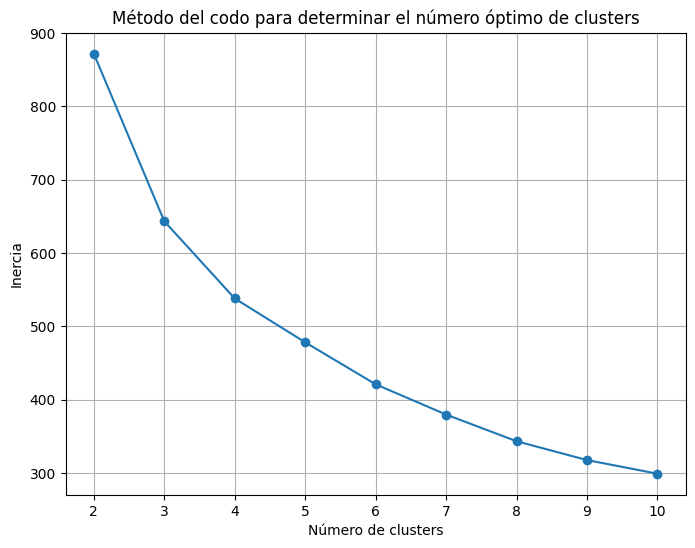

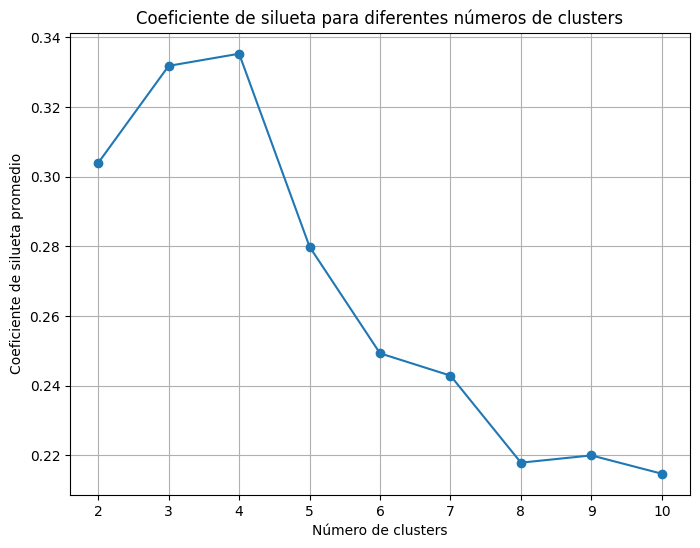

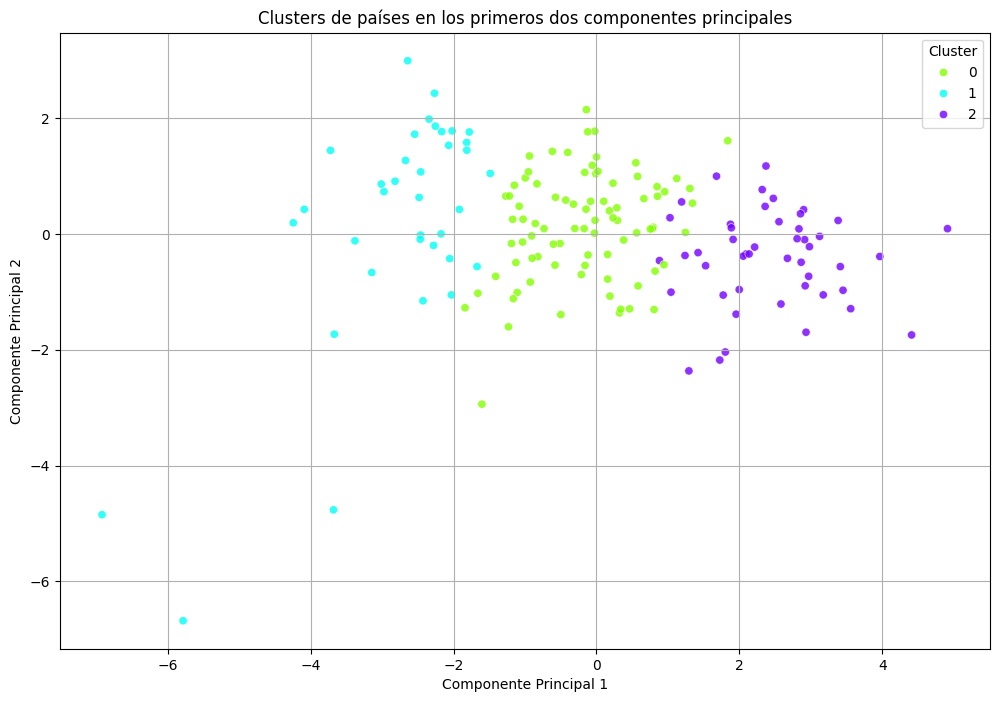

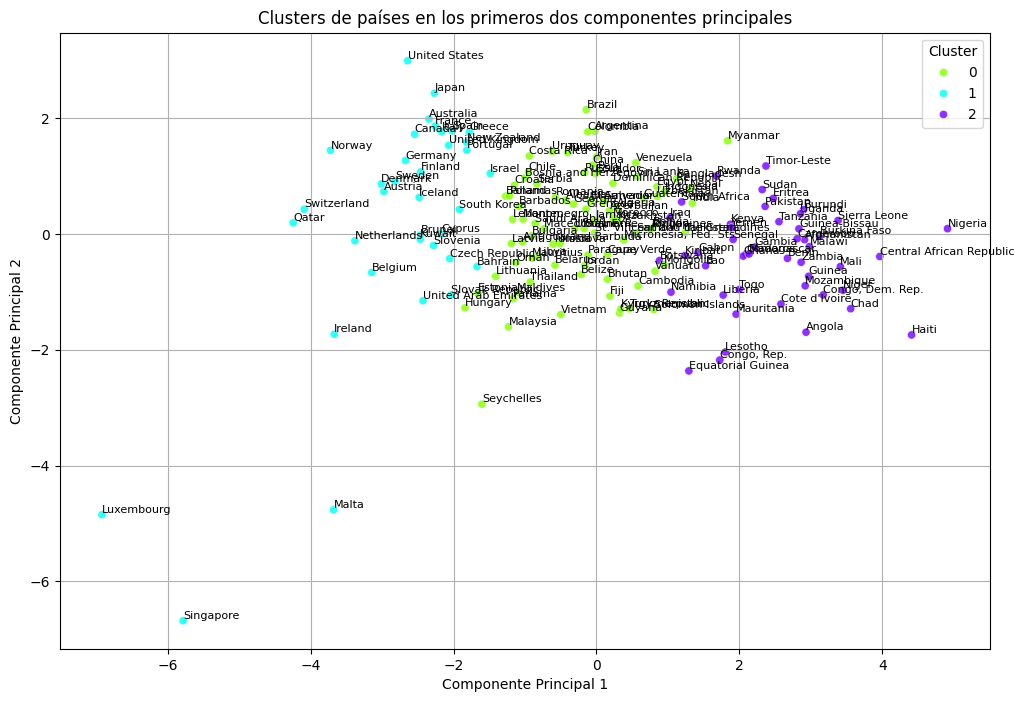


Cluster 0:
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indonesia, Iran, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon, Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives, Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Myanmar, Nepal, Oman, Panama, Paraguay, Peru, Philippines, Poland, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Solomon Islands, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan, Thailand, Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, Uruguay, Uzbekistan, Vanuatu, Venezuela, Vietnam

Cluster 1:
Australia, Austria, Bahrain, Belgium, Brunei, Canada, Cyprus, Czech Republic, Denmark, Finlan

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_components = 4
pc_columns = [f'PC{i+1}' for i in range(num_components)]
data_projected_selected = data_projected[:, :num_components]
pc_df_selected = pd.DataFrame(data=data_projected_selected, columns=pc_columns)
pc_df_selected = pd.concat([pc_df_selected, data['country'].reset_index(drop=True)], axis=1)

# Determinar el número óptimo de clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 11))
inertia = []
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pc_df_selected[pc_columns])
    inertia.append(clusterer.inertia_)
    silhouette_avg.append(silhouette_score(pc_df_selected[pc_columns], cluster_labels))

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.grid(True)
plt.show()

# Graficar el coeficiente de silueta
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de silueta promedio')
plt.title('Coeficiente de silueta para diferentes números de clusters')
plt.grid(True)
plt.show()

# Aplicar K-Means clustering con el número óptimo de clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
pc_df_selected['Cluster'] = kmeans.fit_predict(pc_df_selected[pc_columns])

# Paso 4: Visualizar los clusters
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette=sns.color_palette('hsv', optimal_clusters),
    data=pc_df_selected,
    legend='full',
    alpha=0.8
)

plt.title('Clusters de países en los primeros dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Agregar etiquetas de países (opcional)
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette=sns.color_palette('hsv', optimal_clusters),
    data=pc_df_selected,
    legend='full',
    alpha=0.8
)

for i in range(pc_df_selected.shape[0]):
    plt.text(
        x=pc_df_selected['PC1'][i],
        y=pc_df_selected['PC2'][i],
        s=pc_df_selected['country'][i],
        fontdict=dict(color='black', size=8),
        horizontalalignment='left',
        verticalalignment='bottom'
    )

plt.title('Clusters de países en los primeros dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Mostrar los países en cada cluster
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster}:")
    countries_in_cluster = pc_df_selected[pc_df_selected['Cluster'] == cluster]['country'].values
    print(", ".join(countries_in_cluster))

# Analizar las medias de los componentes principales por cluster
cluster_means = pc_df_selected.groupby('Cluster')[pc_columns].mean()
print("\nMedias de los componentes principales por cluster:")
print(cluster_means)

# Añadir las variables originales al DataFrame
pc_df_selected = pd.concat([pc_df_selected.reset_index(drop=True), data_numeric.reset_index(drop=True)], axis=1)

# Calcular las medias de las variables originales por cluster
cluster_means_original = pc_df_selected.groupby('Cluster')[data_numeric.columns].mean()
print("\nMedias de las variables originales por cluster:")
print(cluster_means_original)
